<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\shubh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


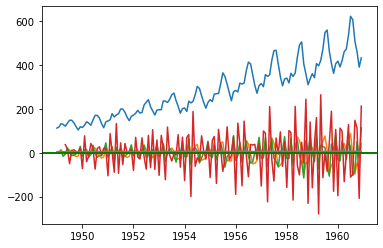

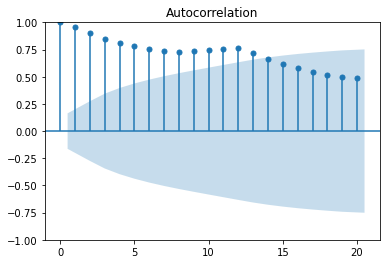

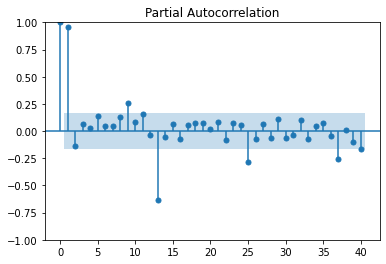

In [3]:
import pyforest
airpas = pd.read_csv('AirPassengers.csv')
airpas.Month = pd.to_datetime(airpas.Month,  infer_datetime_format = True) # Convert into datetime format
ind_airpas = airpas.set_index(['Month']) # Month gets converted to index
plt.plot(ind_airpas) # This is not stationary beacause Mean and Variance Changes is nnot Constant
plt.plot(ind_airpas.diff()) # after differencing This is not stationary beacause Variance Changes is not Constant though now mean is constant
plt.plot(ind_airpas.diff().diff()) # 2nd level of diiferencing
plt.plot(ind_airpas.diff().diff().diff().diff())
ind_airpas_log = np.log(ind_airpas)
plt.plot(ind_airpas_log) 
plt.plot(ind_airpas_log.diff()) # Now it is almost Stationary
plt.axhline(y = 0, color = 'red')
plt.axhline(y = 0.2, color = 'g')
plt.axhline(y = -0.2, color = 'g')

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ind_airpas_log.Passengers, lags= 20); # No Information
plot_pacf(ind_airpas_log.Passengers, lags=40); 

model = ARIMA(ind_airpas_log, order=(2,1,0))
result = model.fit();
result.params # params is your Parameters
fore_values = result.forecast(steps = 12) # it will do the forecast for next 12 time period in this case next 12 months

forecast_values_df = pd.DataFrame(forecast_values[0])
forecast_values_df = np.exp(forecast_values_df)
forecast_values_df

forecast_values_df.rename(columns= {forecast_values_df.columns[0] : 'Predicted'} , inplace = True)

date_for_pred = ['1961-01-01' , '1961-02-01' ,
                 '1961-03-01', '1961-04-01','1961-05-01',
                 '1961-06-01', '1961-07-01','1961-08-01',
                 '1961-09-01', '1961-10-01','1961-11-01',
                 '1961-12-01']

forecast_values_df = pd.concat([forecast_values_df , pd.Series(date_for_pred )] , axis = 1)
forecast_values_df.rename(columns= {forecast_values_df.columns[1] : 'Month'} , inplace = True)
forecast_values_df.Month = pd.to_datetime(forecast_values_df.Month, infer_datetime_format= True )

pred_airpas = forecast_values_df.set_index(['Month'])
pred_airpas.head()

ind_airpas['Passengers'].plot(legend = True , label = "Original" , color ="green") # original
pred_airpas['Predicted'].plot(legend = True , label = "Predicted" , color ="red") # predicted

date_for_pred = ['1960-01-01' , '1960-02-01' ,
                 '1960-03-01', '1960-04-01','1960-05-01',
                 '1960-06-01', '1960-07-01','1960-08-01',
                 '1960-09-01', '1960-10-01','1960-11-01',
                 '1960-12-01',
                 '1961-01-01' , '1961-02-01' ,
                 '1961-03-01', '1961-04-01','1961-05-01',
                 '1961-06-01', '1961-07-01','1961-08-01',
                 '1961-09-01', '1961-10-01','1961-11-01',
                 '1961-12-01']
forecast_values_df = pd.concat([forecast_values_df , pd.Series(date_for_pred )] , axis = 1)
l1 = ['Passengers','Month']
forecast_values_df.columns = l1 # Rename Columns
# forecast_values_df.head()
        
forecast_values_df.Month = pd.to_datetime(forecast_values_df.Month, infer_datetime_format= True )

forecast_values_df = forecast_values_df.set_index(['Month'])
p = range(1, 10)
q = range(1, 10)
for n in q: 
    for m in p:
        model = ARIMA(train_log, order=(n,1,m))
        result = model.fit()
        forecast_values = result.forecast(steps = 24)
        
        test['Passengers'].plot(legend = True , label = "Test" , color ="red")
        train['Passengers'].plot(legend = True , label = "Train" , color ="green")
        forecast_values_df['Passengers'].plot(legend = True , label = "Predicted" , color ="blue")
        
       
        
        
      
        
        
        

In [5]:
date_for_pred = ['1960-01-01', '1960-02-01', '1960-03-01', '1960-04-01',
               '1960-05-01', '1960-06-01', '1960-07-01', '1960-08-01',
               '1960-09-01', '1960-10-01', '1960-11-01', '1960-12-01',
                '1961-01-01' , '1961-02-01' ,
                '1961-03-01', '1961-04-01','1961-05-01',
                '1961-06-01', '1961-07-01','1961-08-01',
                '1961-09-01', '1961-10-01','1961-11-01',
                '1961-12-01']
li_p=[i for i in range(3,12)]
li_q=[1,2,3]
for q in li_q:
    for p in li_p:
        train_model_LOOP= ARIMA(train_log,order=(p,1,q))
        train_result_LOOP=train_model_LOOP.fit();
        
        forecast_values_LOOP=train_result_LOOP.forecast(steps=24)
        forecast_values_LOOP[0]

        pred_values_LOOP=np.round(np.exp(forecast_values_LOOP[0]))  # Anti-Log 
        
        forecast_values_df = pd.concat([pd.Series(pred_values_LOOP) , pd.Series(date_for_pred )] , axis = 1)
        forecast_values_df.columns=['Predicted','Month']

        forecast_values_df.Month = pd.to_datetime(forecast_values_df.Month, infer_datetime_format= True)
        forecast_values_df=forecast_values_df.set_index('Month')

        plt.subplots()
        train['Passengers'].plot(legend = True , label = "Original" , color ="green") # original
        test['Passengers'].plot(legend = True , label = "Test Original" , color ="orange") # original Test
        forecast_values_df['Predicted'].plot(legend = True , label = "Predicted" , color ="red") # predicted
        plt.title(f"p={p},d=1,q={q}")
        plt.show()

NameError: name 'train_log' is not defined

In [1]:
import pyforest

In [2]:
rv = pd.read_csv('RestaurantVisitors.csv', index_col = 'date', parse_dates = True)

<IPython.core.display.Javascript object>

In [3]:
rv = rv.dropna()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

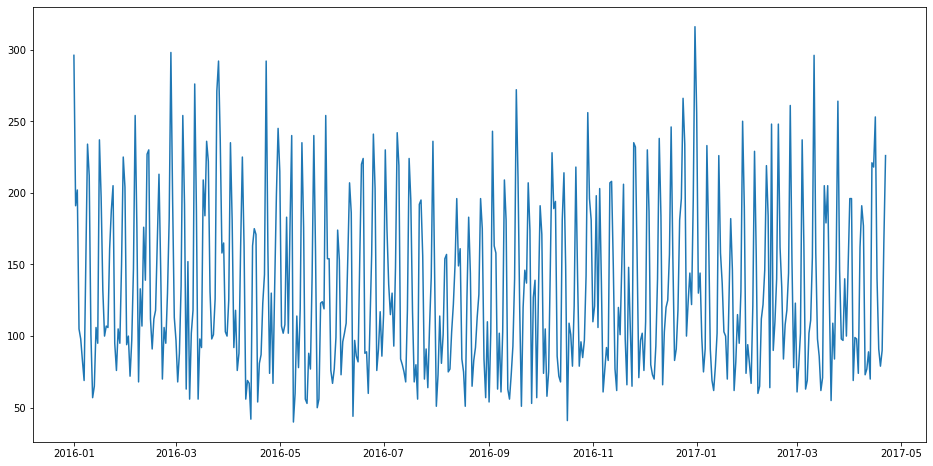

In [6]:
plt.figure(figsize = (16,8))
plt.plot(rv.total)

In [8]:
index_pos = rv[rv['holiday'] == 1].index 
index_pos

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

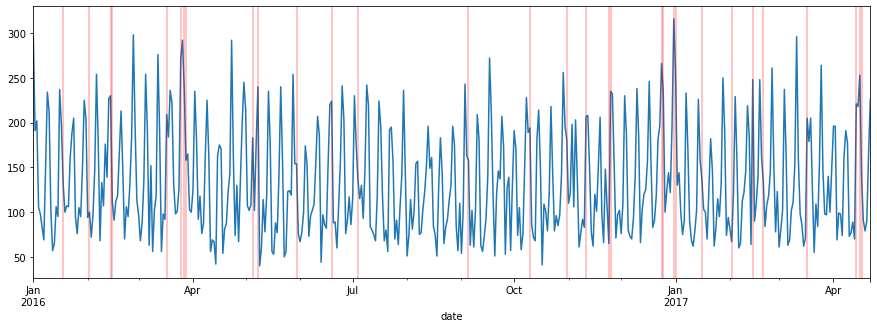

In [9]:
ax = rv['total'].plot(figsize = (15,5))
for day in index_pos:
    ax.axvline(x = day, color = 'red', alpha = 0.3) # axvline is used to draw vertical line

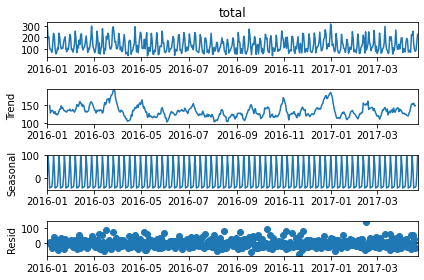

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
rv_seasonal = seasonal_decompose(rv['total'])
rv_seasonal.plot(); # it is just to verify weather seasonal pattern is there or not

In [11]:
# lets do the train test split
# we perform train test and then Validate.
train_rv = rv.iloc[0:450]
test_rv = rv.iloc[450:479]